># Objective:
## The objective of this assignment is to implement PCA on a given dataset and analyse the results.
># Instructions:
* ### Import load_wine dataset from sklearn.dataset
* ### Load the dataset into a Pandas dataframe.
* ### Split the dataset into features and target variables.
* ### Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
* ### Implement PCA on the preprocessed dataset using the scikit-learn library.
* ### Determine the optimal number of principal components to retain based on the explained variance ratio.
* ### Visualise the results of PCA using a scatter plot.
* ### Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
* ### Interpret the results of PCA and clustering analysis.

># Deliverables:
* ### Jupyter notebook containing the code for the PCA implementation.
* ### A report summarising the results of PCA and clustering analysis.
* ### Scatter plot showing the results of PCA.
* ### A table showing the performance metrics for the clustering algorithm.

># Additional Information:
* ### You can use the python programming language.
* ### You can use any other machine learning libraries or tools as necessary.
* ### You can use any visualisation libraries or tools as necessary.

>## 1. Importting necessary libraries

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from warnings import filterwarnings as fw

fw('ignore')

>## 2. Importing wine dataset into dataframe

In [51]:
from sklearn.datasets import load_wine
wines = load_wine(as_frame=True)

In [52]:
wines.data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [53]:
wines.data.shape

(178, 13)

In [54]:
wines.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [55]:
wines.data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [56]:
wines.data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

>## 3. Spliting Dataset 

In [57]:
X = wines.data
y = wines.target

>## 4. Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
X = scaler.fit_transform(X)

>## 5. PCA 

In [60]:
from sklearn.decomposition import PCA
pca = PCA()

In [61]:
pca.fit(X)

PCA()

## `Explained Vairance Ratio`

In [62]:
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

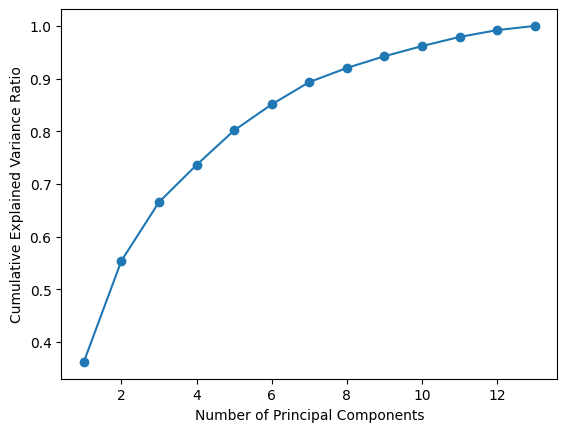

In [63]:
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# `PCA Interpretation`

## The plot shows the cumulative explained variance ratio as a function of the number of principal components.
## The explained variance ratio represents the proportion of the total variance in the data explained by each principal component. 
## By examining the plot,we can identify the number of principal components that capture a significant portion of the variance in the data. 

## The optimal number of principal components to retain is often determined by selecting a threshold (e.g., 90% or 95%) and choosing the number of components that explain that amount of variance.
### Let we assume the threshold of 90%.

In [64]:
pca = PCA(n_components=7)
X = pca.fit_transform(X)

>## 6. K Means Clustering

### `Using Elbow method & KneeLocator to find Optimal K value`

In [65]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [66]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [67]:
wcss

[2067.253445495693,
 1412.4940531038512,
 1032.405559761813,
 936.442522407776,
 867.7562528592744,
 805.8866632508657,
 750.5974082935734,
 697.1054991873428,
 665.5265812014978,
 653.4514608456491]

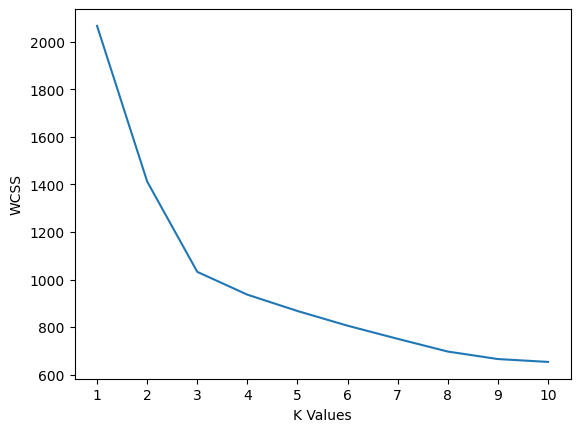

In [68]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("K Values")
plt.ylabel("WCSS")
plt.show()

In [69]:
k_value = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k_value.elbow

3

In [70]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [71]:
clusters = kmeans.fit_predict(X)

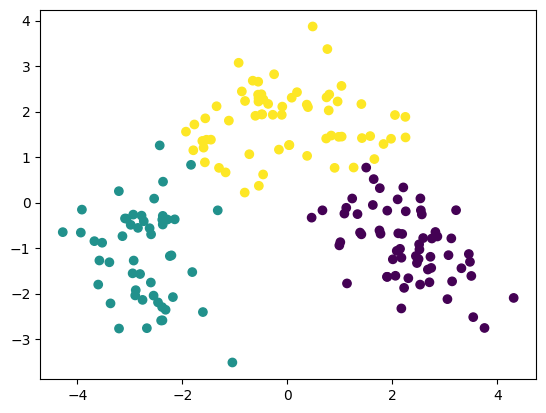

In [72]:
plt.scatter(X[:,0],X[:,1],c=clusters)
plt.show()

>## 7. Clustering Metrics

In [73]:
from sklearn.metrics import silhouette_score,homogeneity_score,completeness_score,v_measure_score,davies_bouldin_score

In [74]:
silhouette = silhouette_score(X,clusters)

In [75]:
homegeneity = homogeneity_score(y,clusters)

In [76]:
completeness = completeness_score(y,clusters)

In [77]:
v_measure = v_measure_score(y,clusters)

In [78]:
davies_bouldin = davies_bouldin_score(X,clusters)

In [79]:
pd.DataFrame({
    'Clustering Metric':
    ['Silhouette Scoure','Homogeneity Score','Completeness Score','V Measure Score','Davies Bouldin Score'],
    'Values':[silhouette,homegeneity,completeness,v_measure,davies_bouldin],
    'Range':['-1 to +1','0 to +1','0 to +1','0 to +1','0 to ∞']
})

,Clustering Metric,Values,Range
0,Silhouette Scoure,0.327635,-1 to +1
1,Homogeneity Score,0.878843,0 to +1
2,Completeness Score,0.872964,0 to +1
3,V Measure Score,0.875894,0 to +1
4,Davies Bouldin Score,1.220610,0 to ∞


>## 8. Clustering Report

## `1. Silhoute Score:` The silhouette score is 0.327 which is near to 0, indicates that the data point is on or very close to the decision boundary between two neighboring clusters.

## `2. Homogeneity Score:` The homogeneity score is 0.878 which is near to 1, indicates that the clusters align with the true class labels.

## `3. Completeness Score:` The complete score is 0.878 which is near to 1, indicates that the true classes are represented within each cluster.

## `4. V_measure Score:` The v_measure score is 0.875 which is near to 1, indicating a perfect clustering solution where each cluster contains only data points from a single true class and all data points belonging to a true class are assigned to the same cluster.


## `5. DBI Score:` The DBI score is 1.22 which is very close to 0,indicates well separated and compact clusters.